# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

# Dataframe

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tesi/Agrimonia_scaled_Bertonico.csv")
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [6]:
df.dropna(inplace=True)
df

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,6204,0.055556,0.079344,0.165180,0.162747,0.236213,0.154064,0.233120,0.342432,0.166667,0.383430,0.012140,0.884630,0.937272,0.991311,0.169876,0.233792,0.103414,0.048313,0.016171,0.032644,0.358312,0.032485,0.212990,0.492368,0.887490,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1821,6205,0.069444,0.066230,0.077282,0.125915,0.187578,0.115605,0.130552,0.000841,0.000000,0.556840,0.216996,0.529030,0.735466,0.859625,0.125796,0.179624,0.112693,0.007291,0.014155,0.027715,0.351300,0.028003,0.220597,0.494498,0.882519,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,6206,0.180556,0.167869,0.139331,0.229555,0.104617,0.116420,0.181653,0.010648,0.000000,0.383430,0.213732,0.492071,0.648345,0.859432,0.192053,0.242633,0.104521,0.027721,0.012056,0.022862,0.344062,0.023307,0.228204,0.496273,0.877713,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,6209,0.416667,0.104918,0.407006,0.623547,0.079270,0.258197,0.166493,0.006207,0.166667,0.300578,0.055368,0.930703,0.919531,0.913304,0.191597,0.17141

In [7]:
X = df.drop(columns=['AQ_pm10'])
y = df['AQ_pm10']

Number of Epochs: 200
Number of Iterations: 10
1/1 [==============================] - 0s 131ms/step
MAE (Iteration 1): 0.31
R-squared (R2) (Iteration 1): -0.24
RMSE (Iteration 1): 0.36
Training time: 3.37 seconds


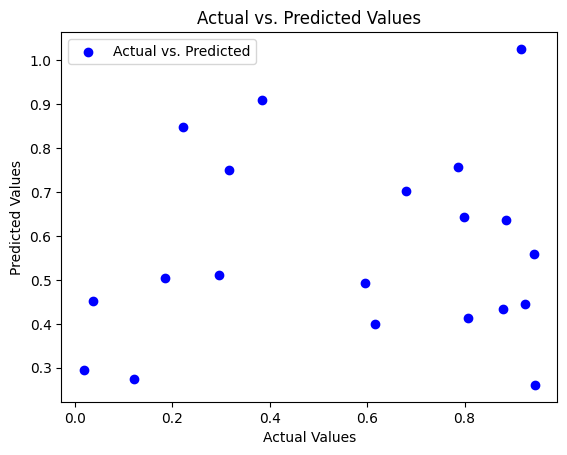

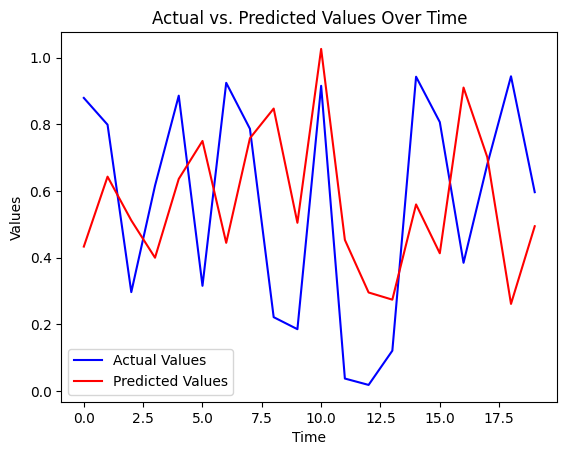


Model Completion: 1/144 (0.69%)
Saving data...
1/1 [==============================] - 0s 54ms/step
MAE (Iteration 2): 0.35
R-squared (R2) (Iteration 2): -0.58
RMSE (Iteration 2): 0.41
Training time: 2.11 seconds

Model Completion: 2/144 (1.39%)
Saving data...
1/1 [==============================] - 0s 54ms/step
MAE (Iteration 3): 0.36
R-squared (R2) (Iteration 3): -0.87
RMSE (Iteration 3): 0.45
Training time: 3.22 seconds

Model Completion: 3/144 (2.08%)
Saving data...
1/1 [==============================] - 0s 55ms/step
MAE (Iteration 4): 0.34
R-squared (R2) (Iteration 4): -0.4
RMSE (Iteration 4): 0.39
Training time: 2.22 seconds

Model Completion: 4/144 (2.78%)
Saving data...


1/1 [==============================] - 0s 88ms/step
MAE (Iteration 5): 0.34
R-squared (R2) (Iteration 5): -0.34
RMSE (Iteration 5): 0.38
Training time: 3.24 seconds

Model Completion: 5/144 (3.47%)
Saving data...


1/1 [==============================] - 0s 61ms/step
MAE (Iteration 6): 0.33
R-squared (R2) (Iteration 6): -0.42
RMSE (Iteration 6): 0.39
Training time: 2.98 seconds

Model Completion: 6/144 (4.17%)
Saving data...
1/1 [==============================] - 0s 54ms/step
MAE (Iteration 7): 0.28
R-squared (R2) (Iteration 7): 0.0
RMSE (Iteration 7): 0.33
Training time: 1.99 seconds


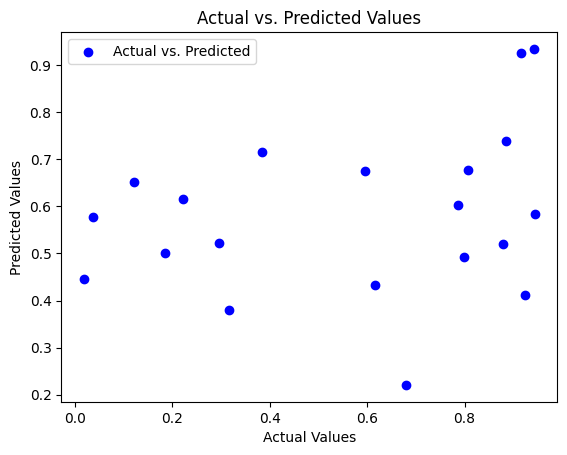

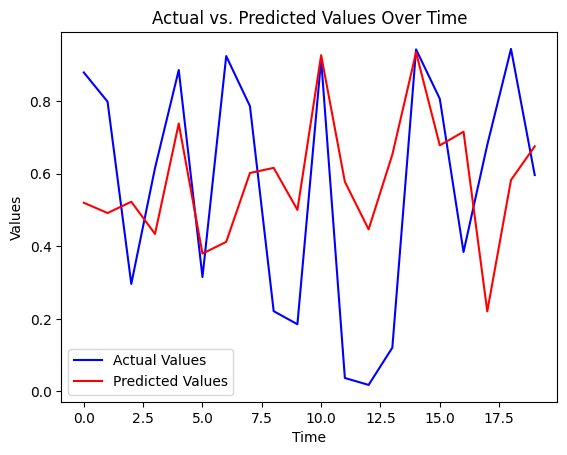


Model Completion: 7/144 (4.86%)
Saving data...
1/1 [==============================] - 0s 55ms/step
MAE (Iteration 8): 0.3
R-squared (R2) (Iteration 8): -0.06
RMSE (Iteration 8): 0.34
Training time: 1.96 seconds

Model Completion: 8/144 (5.56%)
Saving data...
1/1 [==============================] - 0s 59ms/step
MAE (Iteration 9): 0.33
R-squared (R2) (Iteration 9): -0.17
RMSE (Iteration 9): 0.35
Training time: 3.23 seconds

Model Completion: 9/144 (6.25%)
Saving data...
1/1 [==============================] - 0s 142ms/step
MAE (Iteration 10): 0.33
R-squared (R2) (Iteration 10): -0.51
RMSE (Iteration 10): 0.4
Training time: 3.24 seconds

Model Completion: 10/144 (6.94%)
Saving data...
Number of Iterations: 20
1/1 [==============================] - 0s 153ms/step
MAE (Iteration 1): 0.37
R-squared (R2) (Iteration 1): -0.63
RMSE (Iteration 1): 0.42
Training time: 7.3 seconds

Model Completion: 11/144 (7.64%)
Saving data...
1/1 [==============================] - 0s 82ms/step
MAE (Iteration 2): 

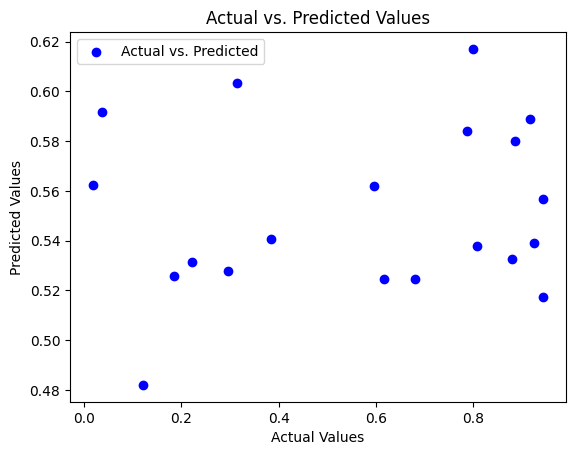

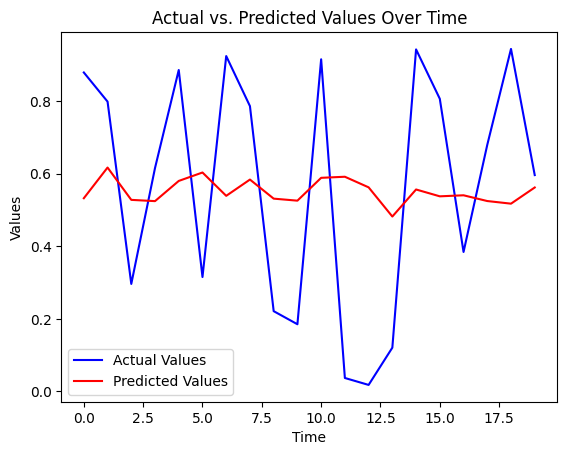


Model Completion: 35/144 (24.31%)
Saving data...
1/1 [==============================] - 0s 81ms/step
MAE (Iteration 6): 0.37
R-squared (R2) (Iteration 6): -0.68
RMSE (Iteration 6): 0.42
Training time: 1.95 seconds

Model Completion: 36/144 (25.00%)
Saving data...
1/1 [==============================] - 0s 64ms/step
MAE (Iteration 7): 0.32
R-squared (R2) (Iteration 7): -0.58
RMSE (Iteration 7): 0.41
Training time: 6.91 seconds

Model Completion: 37/144 (25.69%)
Saving data...
1/1 [==============================] - 0s 53ms/step
MAE (Iteration 8): 0.28
R-squared (R2) (Iteration 8): -0.18
RMSE (Iteration 8): 0.35
Training time: 1.95 seconds

Model Completion: 38/144 (26.39%)
Saving data...
1/1 [==============================] - 0s 57ms/step
MAE (Iteration 9): 0.32
R-squared (R2) (Iteration 9): -0.21
RMSE (Iteration 9): 0.36
Training time: 1.89 seconds

Model Completion: 39/144 (27.08%)
Saving data...
1/1 [==============================] - 0s 60ms/step
MAE (Iteration 10): 0.33
R-squared (R2

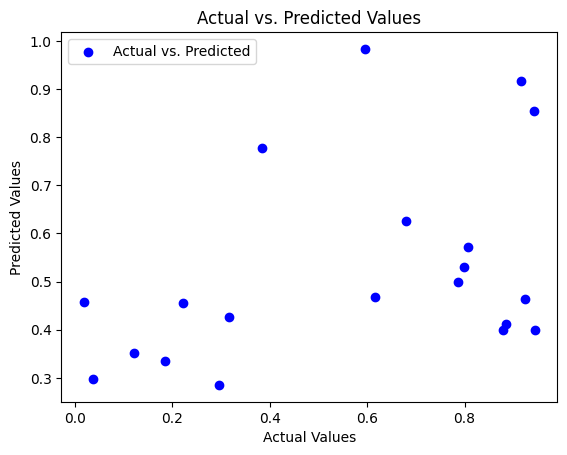

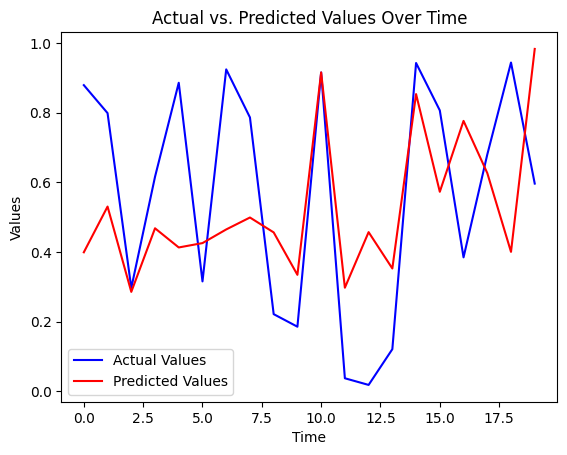


Model Completion: 53/144 (36.81%)
Saving data...
1/1 [==============================] - 0s 56ms/step
MAE (Iteration 24): 0.41
R-squared (R2) (Iteration 24): -1.33
RMSE (Iteration 24): 0.5
Training time: 1.95 seconds

Model Completion: 54/144 (37.50%)
Saving data...
1/1 [==============================] - 0s 58ms/step
MAE (Iteration 25): 0.3
R-squared (R2) (Iteration 25): -0.1
RMSE (Iteration 25): 0.34
Training time: 1.96 seconds

Model Completion: 55/144 (38.19%)
Saving data...
1/1 [==============================] - 0s 94ms/step
MAE (Iteration 26): 0.3
R-squared (R2) (Iteration 26): -0.09
RMSE (Iteration 26): 0.34
Training time: 3.22 seconds

Model Completion: 56/144 (38.89%)
Saving data...
1/1 [==============================] - 0s 58ms/step
MAE (Iteration 27): 0.34
R-squared (R2) (Iteration 27): -0.27
RMSE (Iteration 27): 0.37
Training time: 3.55 seconds

Model Completion: 57/144 (39.58%)
Saving data...
1/1 [==============================] - 0s 55ms/step
MAE (Iteration 28): 0.3
R-squa

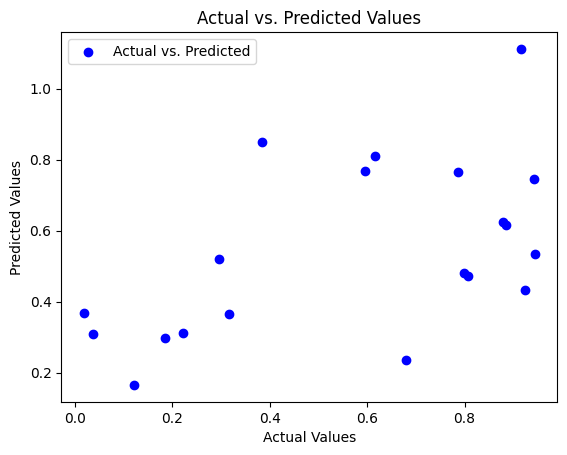

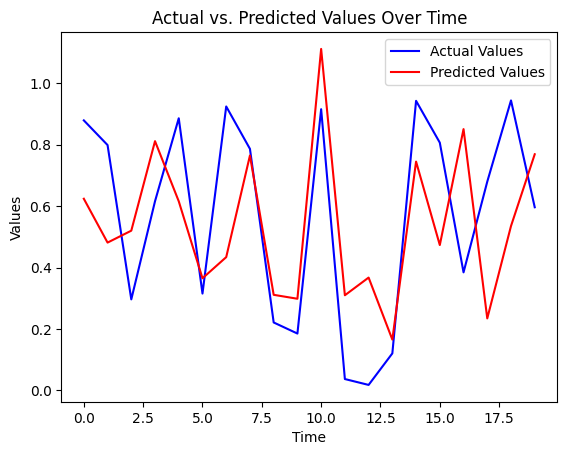


Model Completion: 144/144 (100.00%)
Saving data...
Number of Iterations: 40

Best Model Metrics:
Best MAE: 0.25
Best R-squared (R2): 0.25
Best RMSE: 0.28

Best Hyperparameters for the Best Model:
Number of Epochs: 300
Number of Iterations: 30
Units Hidden Layer: 64
Learning Rate: 0.001
Training Time for Best Model: 3.252155303955078 seconds


In [9]:
import time
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras

# Replace this with your actual data
# X and y should be your features and target variable
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Initialize an empty list to save the results
results = []

# Set hyperparameter ranges
units_hidden_layer = [64, 128, 256]
learning_rates = [0.001, 0.01, 0.1]
num_iterations_range = [10, 20, 30, 40]
num_epochs_range = [200, 300, 400, 500]

# Initialize variables for the best results
best_mae_valid = float('inf')
best_r2_valid = -float('inf')
best_rmse_valid = float('inf')
best_model = None
best_hyperparameters = {}
best_training_time = None

# Create a dictionary to store models and their data
models_data = []

total_models = len(units_hidden_layer) * len(learning_rates) * len(num_iterations_range) * len(num_epochs_range)
model_count = 0

# Loop over the number of epochs
for num_epochs in num_epochs_range:
    if model_count >= total_models:
        break

    print(f"Number of Epochs: {num_epochs}")

    for num_iterations in num_iterations_range:
        print(f"Number of Iterations: {num_iterations}")

        if model_count >= total_models:
            break

        for iteration in range(num_iterations):
            if model_count >= total_models:
                break

            # Split the data into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create a new model for each iteration
            model = keras.Sequential([
                keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                keras.layers.Dense(32, activation='relu'),
                keras.layers.Dense(1)
            ])

            # Vary the model hyperparameters
            units = random.choice(units_hidden_layer)
            lr = random.choice(learning_rates)
            num_epochs_variation = random.choice(num_epochs_range)

            # Set the number of epochs

            model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')

            # Train the model
            start_time = time.time()

            history = model.fit(X_train, y_train, epochs=num_epochs, verbose=0)
            end_time = time.time()
            training_time = end_time - start_time

            # Calculate metrics for the test set
            y_test_pred = model.predict(X_test)
            mae_valid = mean_absolute_error(y_test, y_test_pred)
            r2_valid = r2_score(y_test, y_test_pred)
            rmse_valid = mean_squared_error(y_test, y_test_pred, squared=False)


            # Save the model and data in a dictionary
            model_data = {
                'epoch': num_epochs,
                'iterations': iteration + 1,
                'hidden_layer': units,
                'learning_rate': lr,
                'model': model,
                'training_time': training_time
            }
            models_data.append(model_data)

            model_count += 1  # Increment the completed model count

            # Print partial metrics for this iteration
            print(f"MAE (Iteration {iteration + 1}): {round(mae_valid, 2)}")
            print(f"R-squared (R2) (Iteration {iteration + 1}): {round(r2_valid, 2)}")
            print(f"RMSE (Iteration {iteration + 1}): {round(rmse_valid, 2)}")
            print(f"Training time: {round(training_time, 2)} seconds")

            # Check if the metrics are the best so far
            if r2_valid > best_r2_valid:
                best_mae_valid = mae_valid
                best_r2_valid = r2_valid
                best_rmse_valid = rmse_valid
                best_model = model

                # Save the hyperparameters of the best model
                best_hyperparameters = {
                    "Number of Epochs": num_epochs,
                    "Number of Iterations": num_iterations,
                    "Units Hidden Layer": units,
                    "Learning Rate": lr,
                    'training_time': training_time
                }

                # Plot the actual vs. predicted values
                plt.figure()
                plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted')
                plt.xlabel('Actual Values')
                plt.ylabel('Predicted Values')
                plt.title('Actual vs. Predicted Values')
                plt.legend()
                plt.show()

                # Plot the actual vs. predicted values over time (uncomment to use)
                plt.figure()
                plt.plot(y_test, label='Actual Values', color='blue')
                plt.plot(y_test_pred, label='Predicted Values', color='red')
                plt.xlabel('Time')
                plt.ylabel('Values')
                plt.title('Actual vs. Predicted Values Over Time')
                plt.legend()
                plt.show()

            # Add the results of this iteration to the list
            result = {
                "R2": r2_valid,
                "MAE": mae_valid,
                "RMSE": rmse_valid,
                "Hidden Units": units,
                "Learning Rate": lr,
                "Number of Epochs": num_epochs,
                "Number of Iterations": num_iterations,
                'training_time': training_time
            }
            results.append(result)

            # Print the percentage of completed models
            completion_percentage = (model_count / total_models) * 100
            print(f"\nModel Completion: {model_count}/{total_models} ({completion_percentage:.2f}%)")

            print("Saving data...")
            # Save the results in a JSON file
            with open("/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/results_nn.json", "w") as json_file:
                json.dump(results, json_file, indent=4)

# Print the metrics of the best model
print("\nBest Model Metrics:")
print(f"Best MAE: {round(best_mae_valid, 2)}")
print(f"Best R-squared (R2): {round(best_r2_valid, 2)}")
print(f"Best RMSE: {round(best_rmse_valid, 2)}")

# Print the hyperparameters of the best model
print("\nBest Hyperparameters for the Best Model:")
print(f"Number of Epochs: {best_hyperparameters['Number of Epochs']}")
print(f"Number of Iterations: {best_hyperparameters['Number of Iterations']}")
print(f"Units Hidden Layer: {best_hyperparameters['Units Hidden Layer']}")
print(f"Learning Rate: {best_hyperparameters['Learning Rate']}")
print(f"Training Time for Best Model: {best_hyperparameters['training_time']} seconds")